In [1]:
!ls
import numpy as np
import matplotlib.pyplot as plt
import lenstronomy as lens


code1  code2  starting_guide.ipynb  Untitled.ipynb


In [2]:
!ls code1/f160w-seed3

ABCD.png			non_drizzled-noise_map-4.fits
drizzled_image			non_drizzled-noise_map-5.fits
lens_info_for_Good_team.txt	non_drizzled-noise_map-6.fits
non_drizzled-lens-image-1.fits	non_drizzled-noise_map-7.fits
non_drizzled-lens-image-2.fits	non_drizzled-noise_map-8.fits
non_drizzled-lens-image-3.fits	non_drizzled_psf-1.fits
non_drizzled-lens-image-4.fits	non_drizzled_psf-2.fits
non_drizzled-lens-image-5.fits	non_drizzled_psf-3.fits
non_drizzled-lens-image-6.fits	non_drizzled_psf-4.fits
non_drizzled-lens-image-7.fits	non_drizzled_psf-5.fits
non_drizzled-lens-image-8.fits	non_drizzled_psf-6.fits
non_drizzled-noise_map-1.fits	non_drizzled_psf-7.fits
non_drizzled-noise_map-2.fits	non_drizzled_psf-8.fits
non_drizzled-noise_map-3.fits


In [3]:
from astropy.utils.data import download_file
from astropy.io import fits

path = 'code1/f160w-seed3/'

im_lens = []
im_psf = []
for i in range(1,9):
    im_lens.append(fits.getdata(path+"non_drizzled-lens-image-"+str(i)+".fits"))
    im_psf.append(fits.getdata(path+"non_drizzled_psf-"+str(i)+".fits"))
#plt.imshow(test[0].data,cmap = 'gray')
    
    
im_lens = np.array(im_lens)
im_psf = np.array(im_psf)

(59, 59)

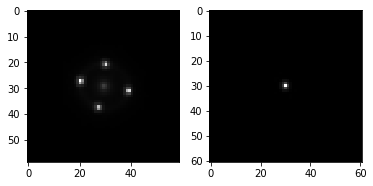

In [4]:
plt.subplot(121)
plt.imshow(im_lens.sum(axis=0),cmap='gray')

plt.subplot(122)
plt.imshow(im_psf.sum(axis=0),cmap='gray')
#plt.imshow(im_psf.sum(axis=0),cmap='gray')

im_lens.sum(axis=0).shape






In [9]:
# import the LensModel class #
from lenstronomy.LensModel.lens_model import LensModel

# specify the choice of lens models #
lens_model_list = ['SPEP', 'SHEAR_GAMMA_PSI', 'SIS']

# setup lens model class with the list of lens models #
lensModel = LensModel(lens_model_list=lens_model_list)

# define parameter values of lens models #
kwargs_spep = {'theta_E': 1.1, 'e1': 0.05, 'e2': 0.05, 'gamma': 2., 'center_x': 0.1, 'center_y': 0}
kwargs_shear = {'gamma_ext': 0.01, 'psi_ext': -1.}
kwargs_sis = {'theta_E': 0.1, 'center_x': 1., 'center_y': -0.1}
kwargs_lens = [kwargs_spep, kwargs_shear, kwargs_sis]

# image plane coordinate #
theta_ra, theta_dec = .9, .4

# source plane coordinate #
beta_ra, beta_dec = lensModel.ray_shooting(theta_ra, theta_dec, kwargs_lens)
# Fermat potential #
fermat_pot = lensModel.fermat_potential(x_image=theta_ra, y_image=theta_dec, x_source=beta_ra, y_source=beta_dec, kwargs_lens=kwargs_lens)

# Magnification #
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)


In [10]:
# ellipticity definitions:
import lenstronomy.Util.param_util as param_util

# axis ratio (minor/major axis)
q = 0.8
# angle of major axis (radian)
phi = 0.5
e1, e2 = param_util.phi_q2_ellipticity(phi=phi, q=q)
# inverse transformation
phi, q = param_util.ellipticity2phi_q(e1, e2)

# shear definition:

# shear strength
gamma = 0.1
# shear direction
phi_gamma = -0.5
# distortion matrix
gamma1, gamma2 = param_util.phi_gamma_ellipticity(phi=phi_gamma, gamma=gamma)
# inverse transform
phi_gamma, gamma = param_util.ellipticity2phi_gamma(gamma1, gamma2)

In [11]:
# keep the imports and variables from above #
# specify redshifts of deflectors #
redshift_list = [0.5, 0.5, .1]
# specify source redshift #
z_source = 1.5
# setup lens model class with the list of lens models #
lensModel_mp = LensModel(lens_model_list=lens_model_list, z_source=z_source, lens_redshift_list=redshift_list, multi_plane=True)

# source plane coordinate #
beta_ra, beta_dec = lensModel_mp.ray_shooting(theta_ra, theta_dec, kwargs_lens)

# Magnification #
mag = lensModel_mp.magnification(theta_ra, theta_dec, kwargs_lens)

# arrival time relative to a straight path through (0,0) #
dt = lensModel_mp.arrival_time(theta_ra, theta_dec, kwargs_lens)

In [12]:
# keep the imports and variables from above #
# import the lens equation solver class #
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

# specifiy the lens model class to deal with #
solver = LensEquationSolver(lensModel)

# solve for image positions provided a lens model and the source position #
theta_ra, theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens)

# the magnification of the point source images #
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)

/home/clarkguilty/anaconda3/envs/lenstronomy/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


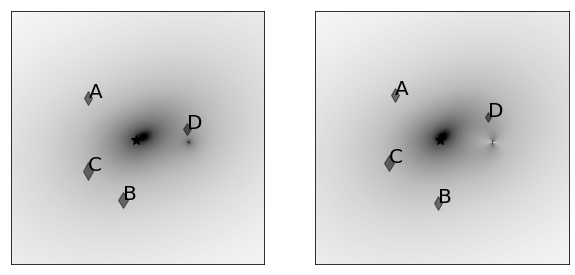

In [13]:
import lenstronomy.Plots.output_plots as lens_plot
f, axex = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex[0], lensModel=lensModel, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=False)
lens_plot.lens_model_plot(axex[1], lensModel=lensModel_mp, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=False)
f.show()